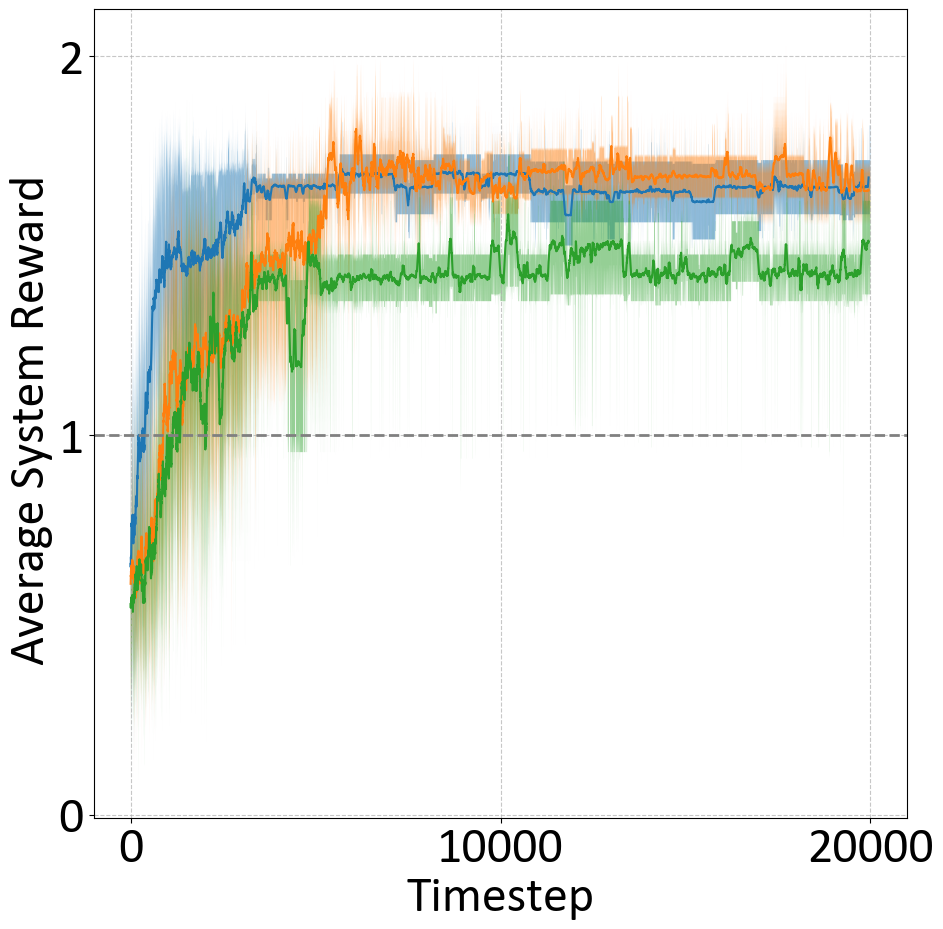

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# Set default font for the entire plot
plt.rc('font', family='calibri', size=12)
# set parameters

# 50%
nl1 = 6
ns1 = 10

# 100%
nl2 = 8
ns2 = 8

# 150%
nl3 = 10
ns3 = 6
z_level= 1

def moving_average(arr, window_size):
    moving_averages = []
    for i in range(len(arr) - window_size + 1):
        window = arr[i:i + window_size]
        average = sum(window) / window_size
        moving_averages.append(average)
    return moving_averages

    s_dev = np.std(steps_to_complete, axis=0)


# load simulation results
cum_rew_1 = np.load(f'data/base_comm_dummy/nl{nl1}ns{ns1}t{8}_cum_rew.npy')
mean1 = np.mean(cum_rew_1, axis=0) # average over sims
s_dev1 = np.std(cum_rew_1, axis=0)
lower_bound1 = mean1 - z_level * (s_dev1 / np.sqrt(cum_rew_1.shape[0]))
upper_bound1 = mean1 + z_level  * (s_dev1 / np.sqrt(cum_rew_1.shape[0]))

cum_rew_2 = np.load(f'data/base_comm_dummy/nl{nl2}ns{ns2}t{8}_cum_rew.npy')
mean2 = np.mean(cum_rew_2, axis=0) # average over sims
s_dev2 = np.std(cum_rew_2, axis=0)
lower_bound2 = mean2 - z_level  * (s_dev2 / np.sqrt(cum_rew_2.shape[0]))
upper_bound2 = mean2 + z_level  * (s_dev2 / np.sqrt(cum_rew_2.shape[0]))

cum_rew_3 = np.load(f'data/base_comm_dummy/nl{nl3}ns{ns3}t{8}_cum_rew.npy')
mean3 = np.mean(cum_rew_3, axis=0) # average over sims
s_dev3 = np.std(cum_rew_3, axis=0)
lower_bound3 = mean3 - z_level  * (s_dev3 / np.sqrt(cum_rew_3.shape[0]))
upper_bound3 = mean3 + z_level  * (s_dev3 / np.sqrt(cum_rew_3.shape[0]))

fs = 36

# plot cum rew graphs
plt.xlabel('Timestep', fontsize=fs)
plt.ylabel('Average System Reward ', fontsize=fs)

plt.xticks(np.arange(0, 20000+1, 10000))  # ticks at -1, -0.5, 0, 0.5, 1
plt.yticks(np.linspace(0.0, 4.0, 5))  # ticks at -1, -0.5, 0, 0.5, 1

plt.xticks(fontsize=fs)  # Adjust the fontsize as needed
plt.yticks(fontsize=fs)  # Adjust the fontsize as needed

plt.plot(moving_average(mean1,50), label='k=5')
plt.plot(moving_average(mean2,50), label='k=10')
plt.plot(moving_average(mean3,50), label='k=15')
plt.fill_between(range(len(mean1)), lower_bound1, upper_bound1, alpha=0.5)
plt.fill_between(range(len(mean2)), lower_bound2, upper_bound2, alpha=0.5)
plt.fill_between(range(len(mean3)), lower_bound3, upper_bound3, alpha=0.5)



fig = plt.gcf()
fig.set_size_inches(10.5, 10.5)
plt.axhline(y=1, color='grey', linestyle='--', linewidth=2, label='LoMC')
#legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.22), fontsize=fs, ncol=2,frameon =False )
plt.grid(True, linestyle='--', alpha=0.7)




Text(0, 0.5, 'Average System Communication Action ')

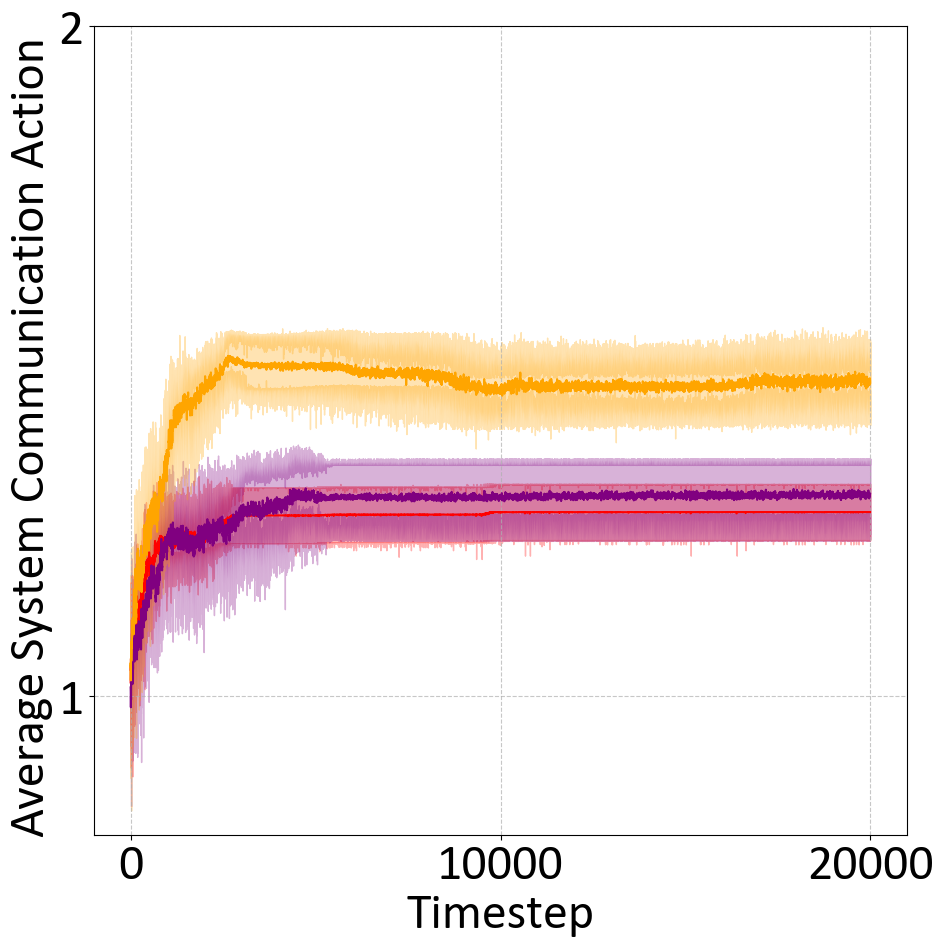

In [11]:
actions_1 = np.load(f'data/base_comm_dummy/nl{nl1}ns{ns1}t{8}_actions.npy')
actions_2 = np.load(f'data/base_comm_dummy/nl{nl2}ns{ns2}t{8}_actions.npy')
actions_3 = np.load(f'data/base_comm_dummy/nl{nl3}ns{ns3}t{8}_actions.npy')

fig, ax = plt.subplots(figsize=(10.5, 10.5))

mean_actions1 = np.mean(actions_1, axis=2) # average over agents
mean_zeta1 = np.mean(mean_actions1, axis=0) # avg over sims
s_dev_zeta1 = np.std(mean_actions1, axis=0)# std dev over sims
lower_bound_zeta1 = mean_zeta1 - 1 * (s_dev_zeta1/ np.sqrt(mean_actions1.shape[0]))
upper_bound_zeta1 = mean_zeta1 + 1  * (s_dev_zeta1/ np.sqrt(mean_actions1.shape[0]))

mean_actions2 = np.mean(actions_2, axis=2) # average over agents
mean_zeta2 = np.mean(mean_actions2, axis=0) # avg over sims
s_dev_zeta2 = np.std(mean_actions2, axis=0)# std dev over sims
lower_bound_zeta2 = mean_zeta2 - 1 * (s_dev_zeta2/ np.sqrt(mean_actions2.shape[0]))
upper_bound_zeta2 = mean_zeta2 + 1  * (s_dev_zeta2/ np.sqrt(mean_actions2.shape[0]))

mean_actions3 = np.mean(actions_3, axis=2) # average over agents
mean_zeta3 = np.mean(mean_actions3, axis=0) # avg over sims
s_dev_zeta3 = np.std(mean_actions3, axis=0)# std dev over sims
lower_bound_zeta3 = mean_zeta3 - 1 * (s_dev_zeta3/ np.sqrt(mean_actions3.shape[0]))
upper_bound_zeta3 = mean_zeta3 + 1  * (s_dev_zeta3/ np.sqrt(mean_actions3.shape[0]))

plt.plot(moving_average(mean_zeta1, 10), color = 'red', label = 'k=5')
plt.plot(moving_average(mean_zeta2, 10) , color = 'purple', label = 'k=10')
plt.plot(moving_average(mean_zeta3, 10), color = 'orange', label = 'k=15')
ax.fill_between(range(len(mean_zeta1)), lower_bound_zeta1, upper_bound_zeta1, alpha=0.3, color='red')
ax.fill_between(range(len(mean_zeta2)), lower_bound_zeta2, upper_bound_zeta2, alpha=0.3, color='purple')
ax.fill_between(range(len(mean_zeta3)), lower_bound_zeta3, upper_bound_zeta3, alpha=0.3, color='orange')


plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(fontsize=fs)  # Adjust the fontsize as needed
plt.yticks(fontsize=fs)  # Adjust the fontsize as needed

plt.xticks(np.arange(0, 20000+1, 10000))  # ticks at -1, -0.5, 0, 0.5, 1
plt.yticks(np.linspace(1, 2.0, 2))  # ticks at -1, -0.5, 0, 0.5, 1

fig = plt.gcf()
fig.set_size_inches(10.5, 10.5)

# plot cum rew graphs
plt.xlabel('Timestep', fontsize=fs)
plt.ylabel('Average System Communication Action ', fontsize=fs)

#legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.22), fontsize=fs, ncol=2,frameon =False )

(array([1., 2.]), [Text(0, 0, ''), Text(0, 0, '')])

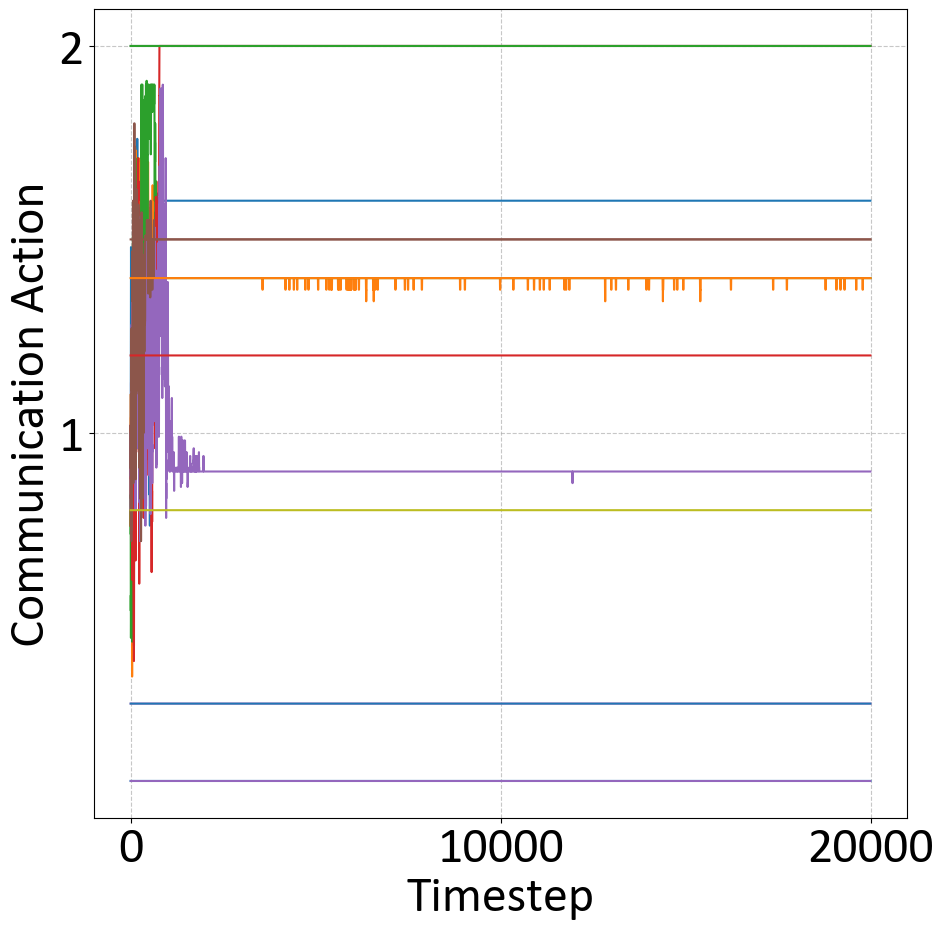

In [12]:
actions_1 = np.load(f'data/base_comm_dummy/nl{nl1}ns{ns1}t{8}_actions.npy')
actions_2 = np.load(f'data/base_comm_dummy/nl{nl2}ns{ns2}t{8}_actions.npy')
actions_3 = np.load(f'data/base_comm_dummy/nl{nl3}ns{ns3}t{8}_actions.npy')


plt.plot(moving_average(actions_1[2],10))

#plt.plot(moving_average(actions_2[1],10))

#plt.plot(moving_average(actions_3[1],10))


fig = plt.gcf()
fig.set_size_inches(10.5, 10.5)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, 20000+1, 10000))  # ticks at -1, -0.5, 0, 0.5, 1
plt.yticks(np.linspace(1, 2.0, 2))  # ticks at -1, -0.5, 0, 0.5, 1
# plot cum rew graphs
plt.xlabel('Timestep', fontsize=fs)
plt.ylabel(' Communication Action ', fontsize=fs)

plt.xticks(fontsize=fs)  # Adjust the fontsize as needed
plt.yticks(fontsize=fs)  # Adjust the fontsize as needed


In [13]:
# load simulation results
cum_rew_1 = np.load(f'data/base_comm_dummy/n{30}t{8}_cum_rew.npy')
for i in range(5):
    plt.plot(moving_average(cum_rew_1[i,:], 50))


fs = 36

# plot cum rew graphs
plt.xlabel('Timestep', fontsize=fs)
plt.ylabel('Average System Reward ', fontsize=fs)

plt.xticks(np.arange(0, 20000+1, 10000))  # ticks at -1, -0.5, 0, 0.5, 1
plt.yticks(np.linspace(0.0, 3.0, 4))  # ticks at -1, -0.5, 0, 0.5, 1

plt.xticks(fontsize=fs)  # Adjust the fontsize as needed
plt.yticks(fontsize=fs)  # Adjust the fontsize as needed


fig = plt.gcf()
fig.set_size_inches(10.5, 10.5)
plt.axhline(y=1, color='grey', linestyle='--', linewidth=2, label='LoMC')
#legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.22), fontsize=fs, ncol=2,frameon =False )
plt.grid(True, linestyle='--', alpha=0.7)



FileNotFoundError: [Errno 2] No such file or directory: 'data/base_comm_dummy/n30t8_cum_rew.npy'